In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (400., 150.)
from salem import get_demo_file, open_xr_dataset, GeoTiff, wgs84
%matplotlib inline
import glob
from utils import u_darrays as uda
import cartopy.crs as ccrs
import cartopy
import pandas as pd
from utils import constants as cnst
import salem
import ipdb
from salem import DataLevels
from scipy import ndimage
import shapely.geometry as shpg

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
topo1 = cnst.WA_TOPO_3KM
topo2 = cnst.LSTA_TOPO

In [4]:
t1 = xr.open_dataarray(topo1)
t2 = xr.open_dataarray(topo2)

In [5]:
t1

<xarray.DataArray 'h' (lat: 1030, lon: 1836)>
[1891080 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 3.508 3.535 3.562 3.59 ... 29.87 29.9 29.92 29.95
  * lon      (lon) float64 -18.49 -18.46 -18.44 -18.41 ... 30.91 30.93 30.96

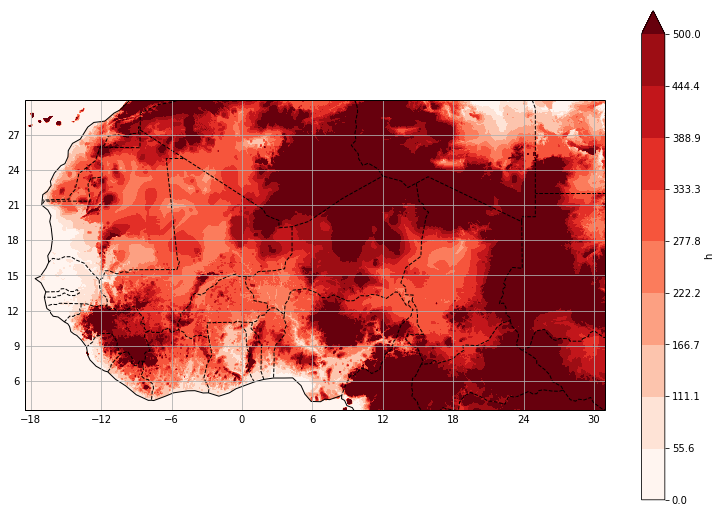

In [6]:
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
t1.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', levels=np.linspace(0,500,10))
ax.coastlines()   ## adds coastlines
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
#f.savefig('/home/ck/DIR/cornkle/data/NFLICS/NFLICS_lsta_test.png')

In [7]:
t1 = t1.sel(lon=slice(-12,12), lat=slice(9,20))

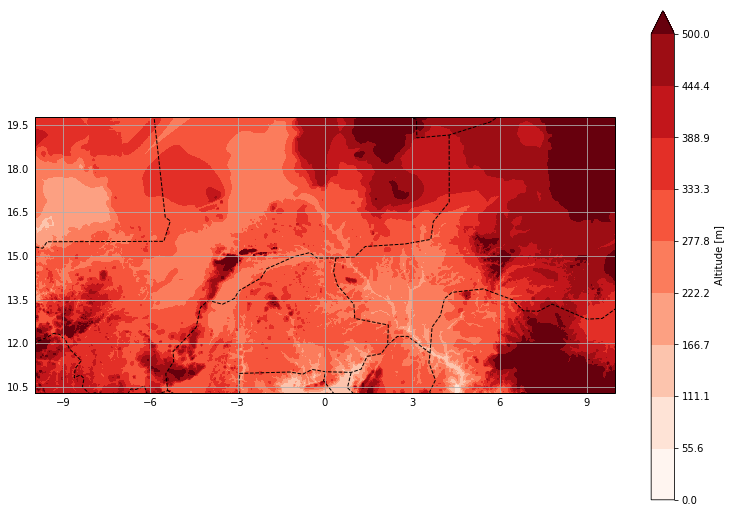

In [8]:
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
t2.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', levels=np.linspace(0,500,10))
ax.coastlines()   ## adds coastlines
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
#f.savefig('/home/ck/DIR/cornkle/data/NFLICS/NFLICS_lsta_test.png')

In [9]:
msg = xr.open_dataarray('/home/ck/DIR/cornkle/MCSfiles/blob_map_MCSs_-50_JJAS_gt15k.nc')

In [10]:
cores = xr.open_dataarray('/home/ck/DIR/cornkle/MCSfiles/blob_map_allscales_-50_JJAS_points_dominant.nc')

In [11]:
msg

<xarray.DataArray (time: 14589, lat: 253, lon: 519)>
[1915637823 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -11.66 -11.62 -11.57 -11.53 ... 11.51 11.56 11.6
  * lat      (lat) float64 8.986 9.03 9.075 9.119 ... 19.87 19.91 19.95 19.99
  * time     (time) datetime64[ns] 2006-06-01 ... 2010-09-30T23:00:00

In [12]:
cores

<xarray.DataArray (time: 12540, lat: 253, lon: 519)>
[1646589780 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -11.66 -11.62 -11.57 -11.53 ... 11.51 11.56 11.6
  * lat      (lat) float64 8.986 9.03 9.075 9.119 ... 19.87 19.91 19.95 19.99
  * time     (time) datetime64[ns] 2006-06-01 ... 2010-09-30T23:00:00

In [13]:
msg = msg[msg['time.hour']==17]


In [14]:
counts = cores.where((cores<=65) & (cores>0)).count('time')

MemoryError: Unable to allocate array with shape (12540, 253, 519) and data type float64

In [ ]:
hours = counts.copy()
hours.values[hours>0] = 17

NameError: name 'counts' is not defined

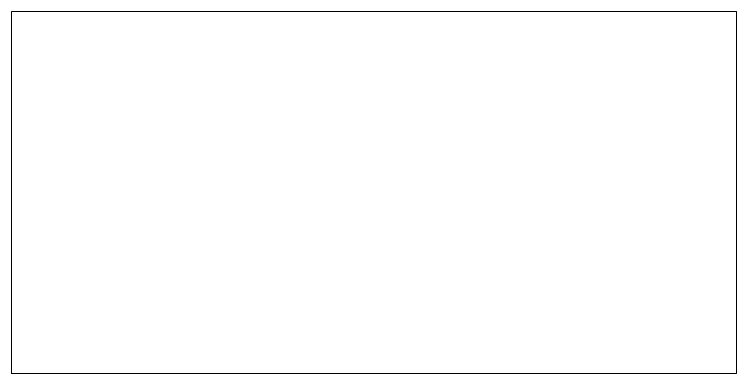

In [15]:
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(counts.lon, counts.lat, counts,transform=ccrs.PlateCarree(), cmap='viridis', levels=np.arange(1,10,1))
plt.contour(t1.lon,t1.lat,  t1,transform=ccrs.PlateCarree(), cmap='Reds', levels=np.arange(100,700,200))

ax.coastlines()   ## adds coastlines
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
#f.savefig('/home/ck/DIR/cornkle/data/NFLICS/NFLICS_lsta_test.png')

In [16]:
file = cnst.ERA5
dummy = xr.open_dataset(file + 'monthly/synop_selfmade/CLIM_2006-2010_new/ERA5_2006-2010_CLIM_'+ \
                              str(8).zfill(2)+'-'+str(12).zfill(2)+'_pl_rw.nc')

dummy = uda.flip_lat(dummy)
dummy = dummy.sel(latitude=slice(3,22), longitude=slice(-12,12))

In [17]:
cores = xr.open_dataarray('/home/ck/DIR/cornkle/MCSfiles/blob_map_allscales_-50_JJAS_points_dominant.nc')

In [18]:
topo1 = cnst.WA_TOPO_3KM
t1 = xr.open_dataarray(topo1)
t1 = t1.sel(lon=slice(-12,12), lat=slice(3,22))
#t1high = t1.copy(deep=True)
#grid = dummy.salem.grid() #t1.salem.grid.regrid(factor=0.1)

#dat = grid.lookup_transform(t1)
#grid = grid.to_dataset()
#t1 = xr.DataArray(dat, coords=[grid['y'], grid['x']], dims=['lat','lon'])
map = t1.salem.get_map()

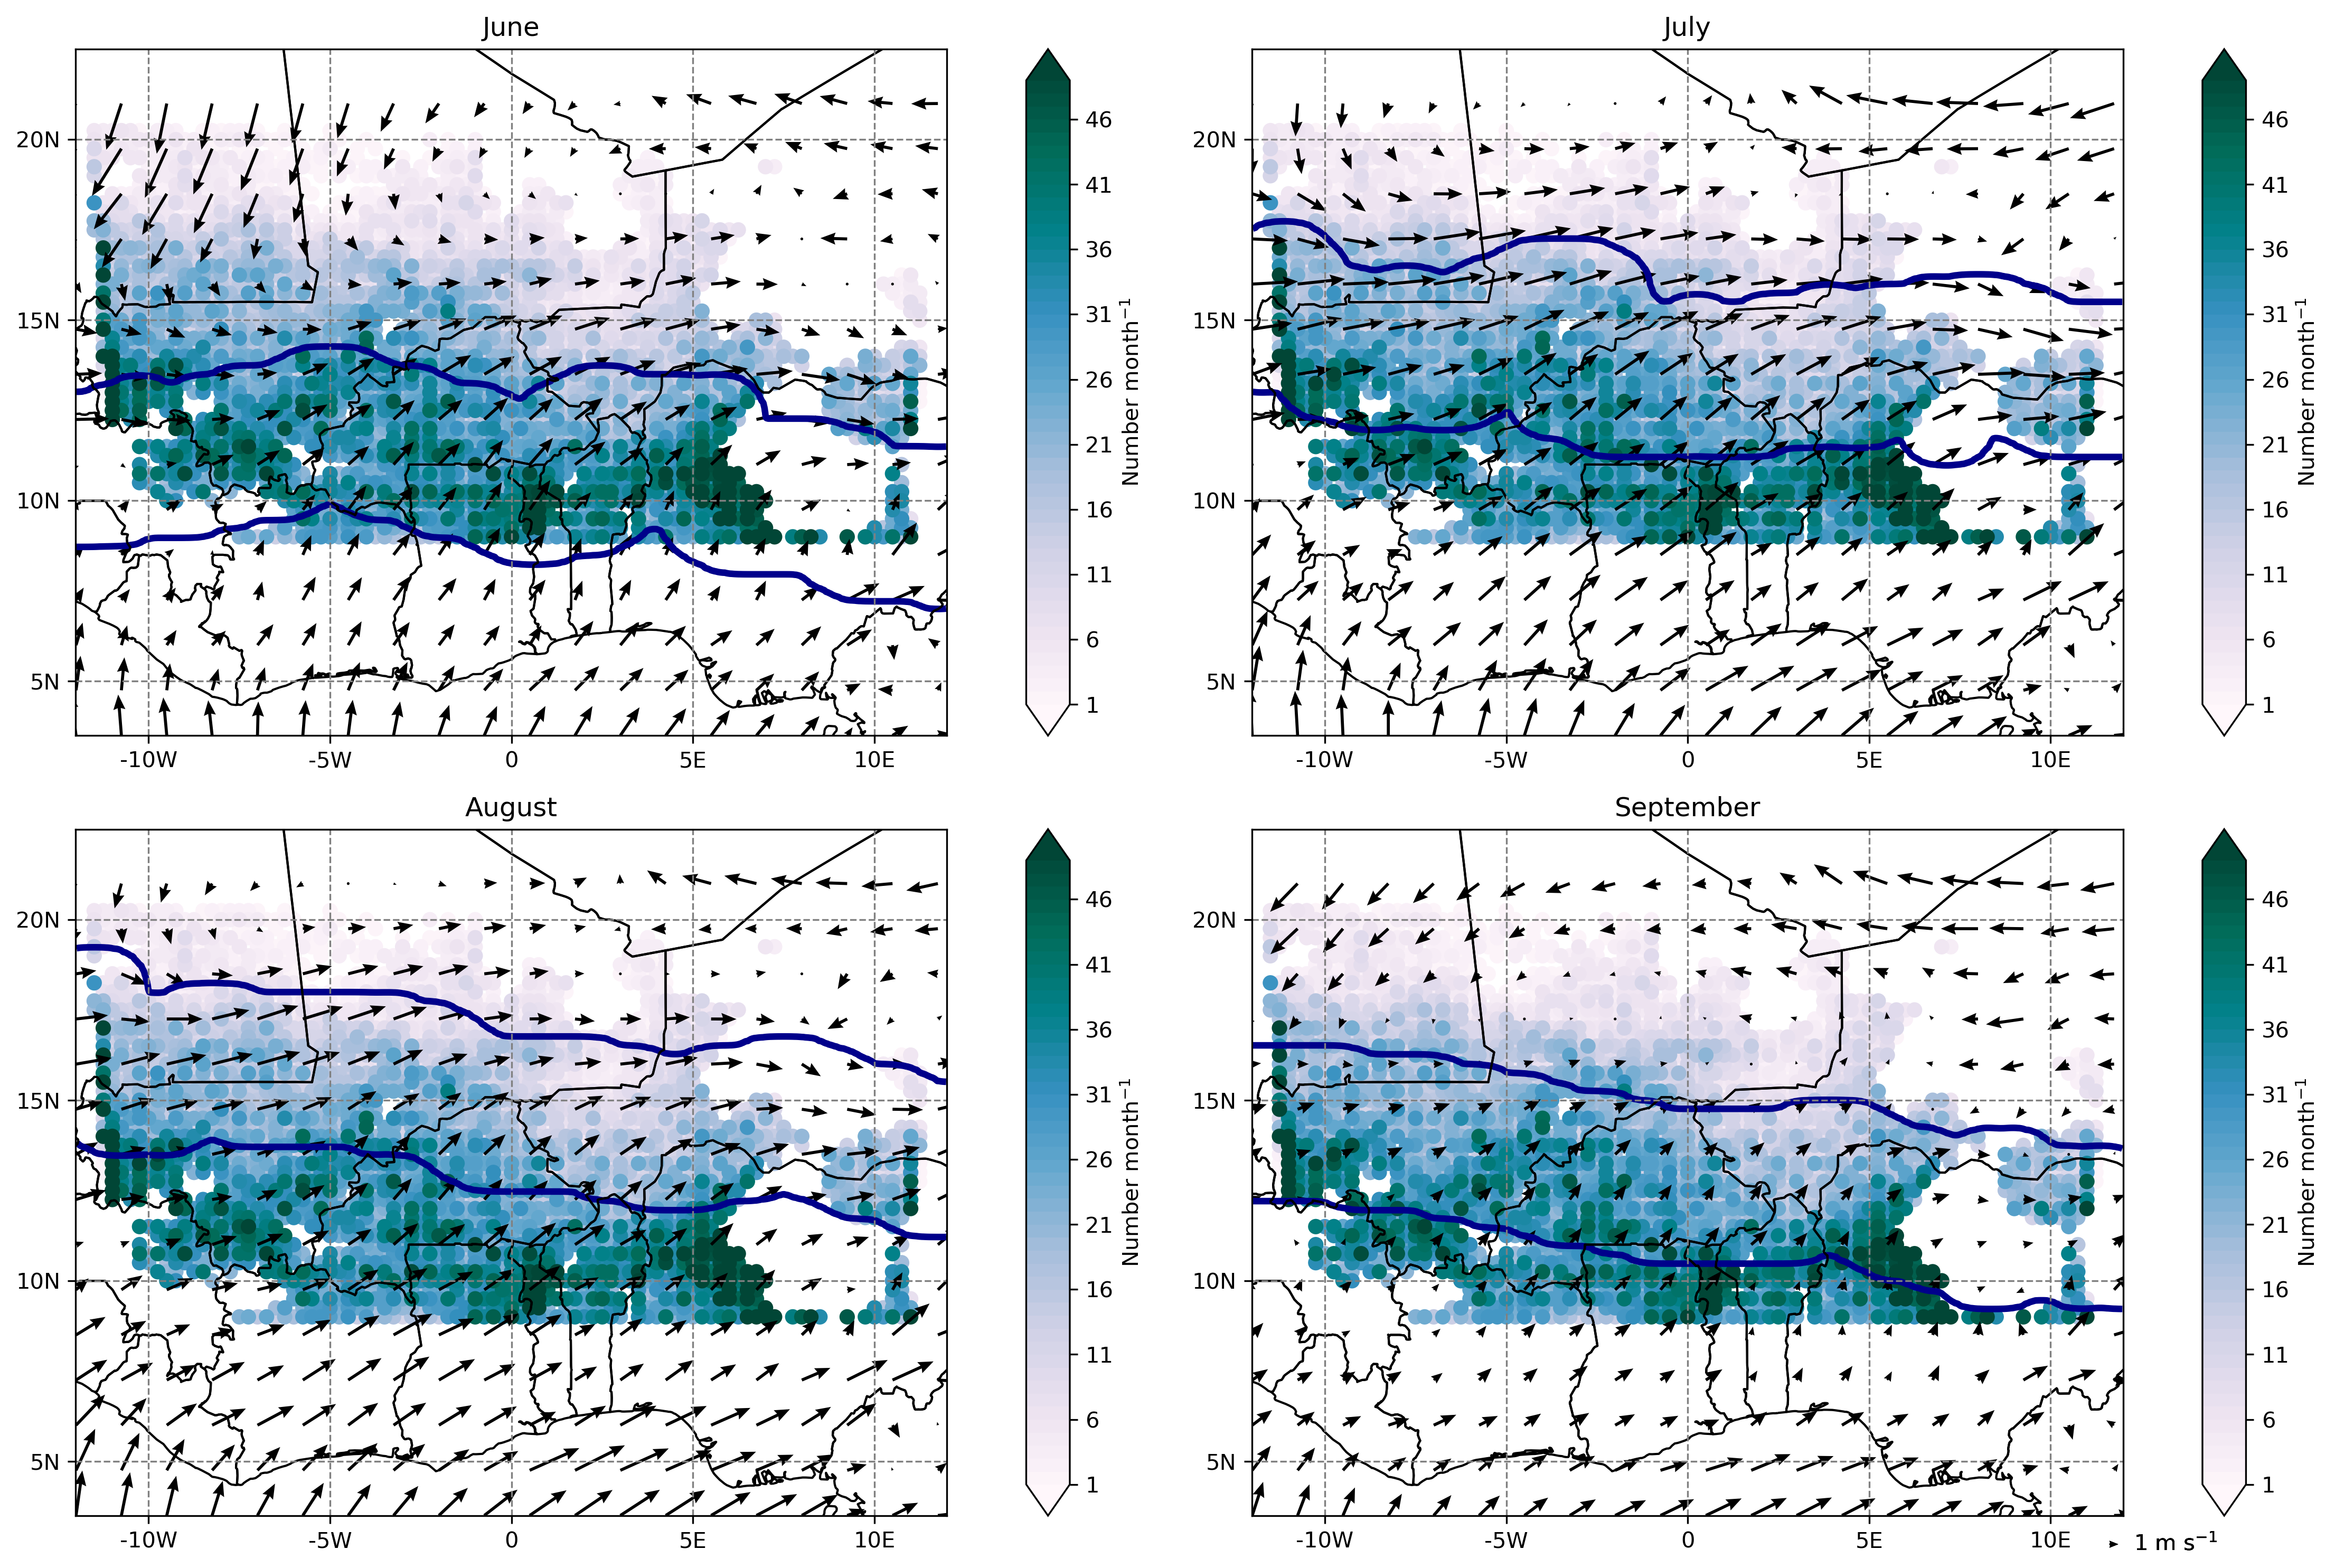

In [46]:
f = plt.figure(figsize=(15,10), dpi=300)
mname = ['June', 'July', 'August', 'September']

for ids, m in enumerate([6,7,8,9]):
    
    pl_clim = xr.open_dataset(file + 'monthly/synop_selfmade/CLIM_2006-2010_new/ERA5_2006-2010_CLIM_'+ \
                              str(m).zfill(2)+'-'+str(12).zfill(2)+'_pl_rw.nc')
    pl_clim = uda.flip_lat(pl_clim)
    pl_clim = pl_clim.sel(latitude=slice(3,23), longitude=slice(-12,12))
    
    u = pl_clim['u'].sel(level=650).squeeze()
    
    
    usrfc =pl_clim['u'].sel(level=925).squeeze() 
    vsrfc =pl_clim['v'].sel(level=925).squeeze() 
    
    
    #aej_speed = u.min('latitude')

    posmin = np.argmin(u.values, axis=0)
        
    aej_lat = u.latitude.values[posmin]
    
    perc = np.percentile(u.values, 10, axis=0)
    
    empty = np.zeros_like(u.values)
    #empty[posmin,np.arange(u.shape[1])] = 1
    
    for pids, pp in enumerate(perc):
        parr = empty[:,pids]
        uarr = u[:,pids]
        ppos = np.where(uarr<=pp)
        parr[ppos] = 1
        empty[:,pids ] = parr
    
    earr = u.copy()
    earr.values = empty
    #empty = ndimage.gaussian_filter(empty,10, mode='nearest')
    
    #ipdb.set_trace()
       
    monthly = cores[cores['time.month']==m]
    ax = f.add_subplot(2,2,ids+1)
    sums = None
    cnt = 0
    x = []
    y = []
    val = []
    for h in list(np.arange(15,24))+list(np.arange(0,15)): 
        hourly = monthly[monthly['time.hour']==h]
        counts = hourly.where((hourly<=65) & (hourly>0)).count('time')
        
        if sums is None:
            sums = counts
            cnt+=1
        else:
            sums = sums + counts
            cnt+=1
    sums.name = 'count'
    sums_on_topo = dummy.salem.lookup_transform(sums, method=np.sum)
    coarse_topo = dummy.salem.lookup_transform(t1)
    
    empty_on_map = t1.salem.transform(earr, interp='linear')
    empty_on_map = ndimage.gaussian_filter(empty_on_map,10, mode='nearest')
    
    sums_on_topo.values[coarse_topo>420]=0
    u_on_topo = t1.salem.transform(u, interp='linear')
    
    pos = np.where(sums_on_topo>0)
    xv = (dummy['longitude'])[pos[1]]
    yv = (dummy['latitude'])[pos[0]]
    points = sums_on_topo.values[pos]
#     xv, yv = np.meshgrid(sums['lon'], sums['lat'])
    xl, yl = map.grid.transform(xv, yv)
    
    st=5
    windx = (dummy['longitude'])[0::st]
    windy = (dummy['latitude'])[0::st]
    usrfc = usrfc[0::st, 0::st]
    vsrfc = vsrfc[0::st, 0::st]
    
    #ipdb.set_trace()
    
    xx, yy = map.grid.transform(windx, windy)
    
    xx, yy = np.meshgrid(xx, yy)
    
    
    #aejx, aejy = map.grid.transfrom(dummy['longitude'],aej_lat)
    
    sort = np.argsort(points)
    xl = xl[sort]
    yl = yl[sort]
    points = points[sort]
    
    masked = np.ma.masked_invalid(sums_on_topo)
    #ipdb.set_trace()
    map.set_data()
    #map.set_data(masked, interp='linear', crs=dummy.salem.grid)
    #map.set_plot_params(cmap='Blues', levels=[400,450])

    dl = DataLevels(points, levels=np.arange(1, 50, 1), extend='both', cmap='PuBuGn')
    cax = ax.scatter(xl, yl, c=dl.to_rgb())
    dl.append_colorbar(ax, label=r'Number month$^{-1}$')
    #map.set_contour(empty_on_map, colors='darkblue', levels=[0.000007,1], linewidths=3)
    map.set_contour(empty_on_map, colors='darkblue', levels=[0.000007,1], linewidths=3)
    uu = ndimage.gaussian_filter(u.values,6, mode='nearest')
#     if m in [6,9]:
#         aj = 12.5
#     else:
#         aj = 10
#     map.set_contour(u_on_topo*-1, colors='darkblue', levels=[-99,perc*-1], linewidths=3)
    
    qu = ax.quiver(xx, yy, usrfc, vsrfc, scale=100, headwidth=4)
    qk = plt.quiverkey(qu, 0.9, 0.02,1, '1 m s$^{-1}$',
                       labelpos='E', coordinates='figure')
    
    map.visualize(ax=ax, addcbar=False, title=mname[ids])
   
    
    
plt.tight_layout()
f.savefig(cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients/2hOverlap/maps.png')
        
        
        

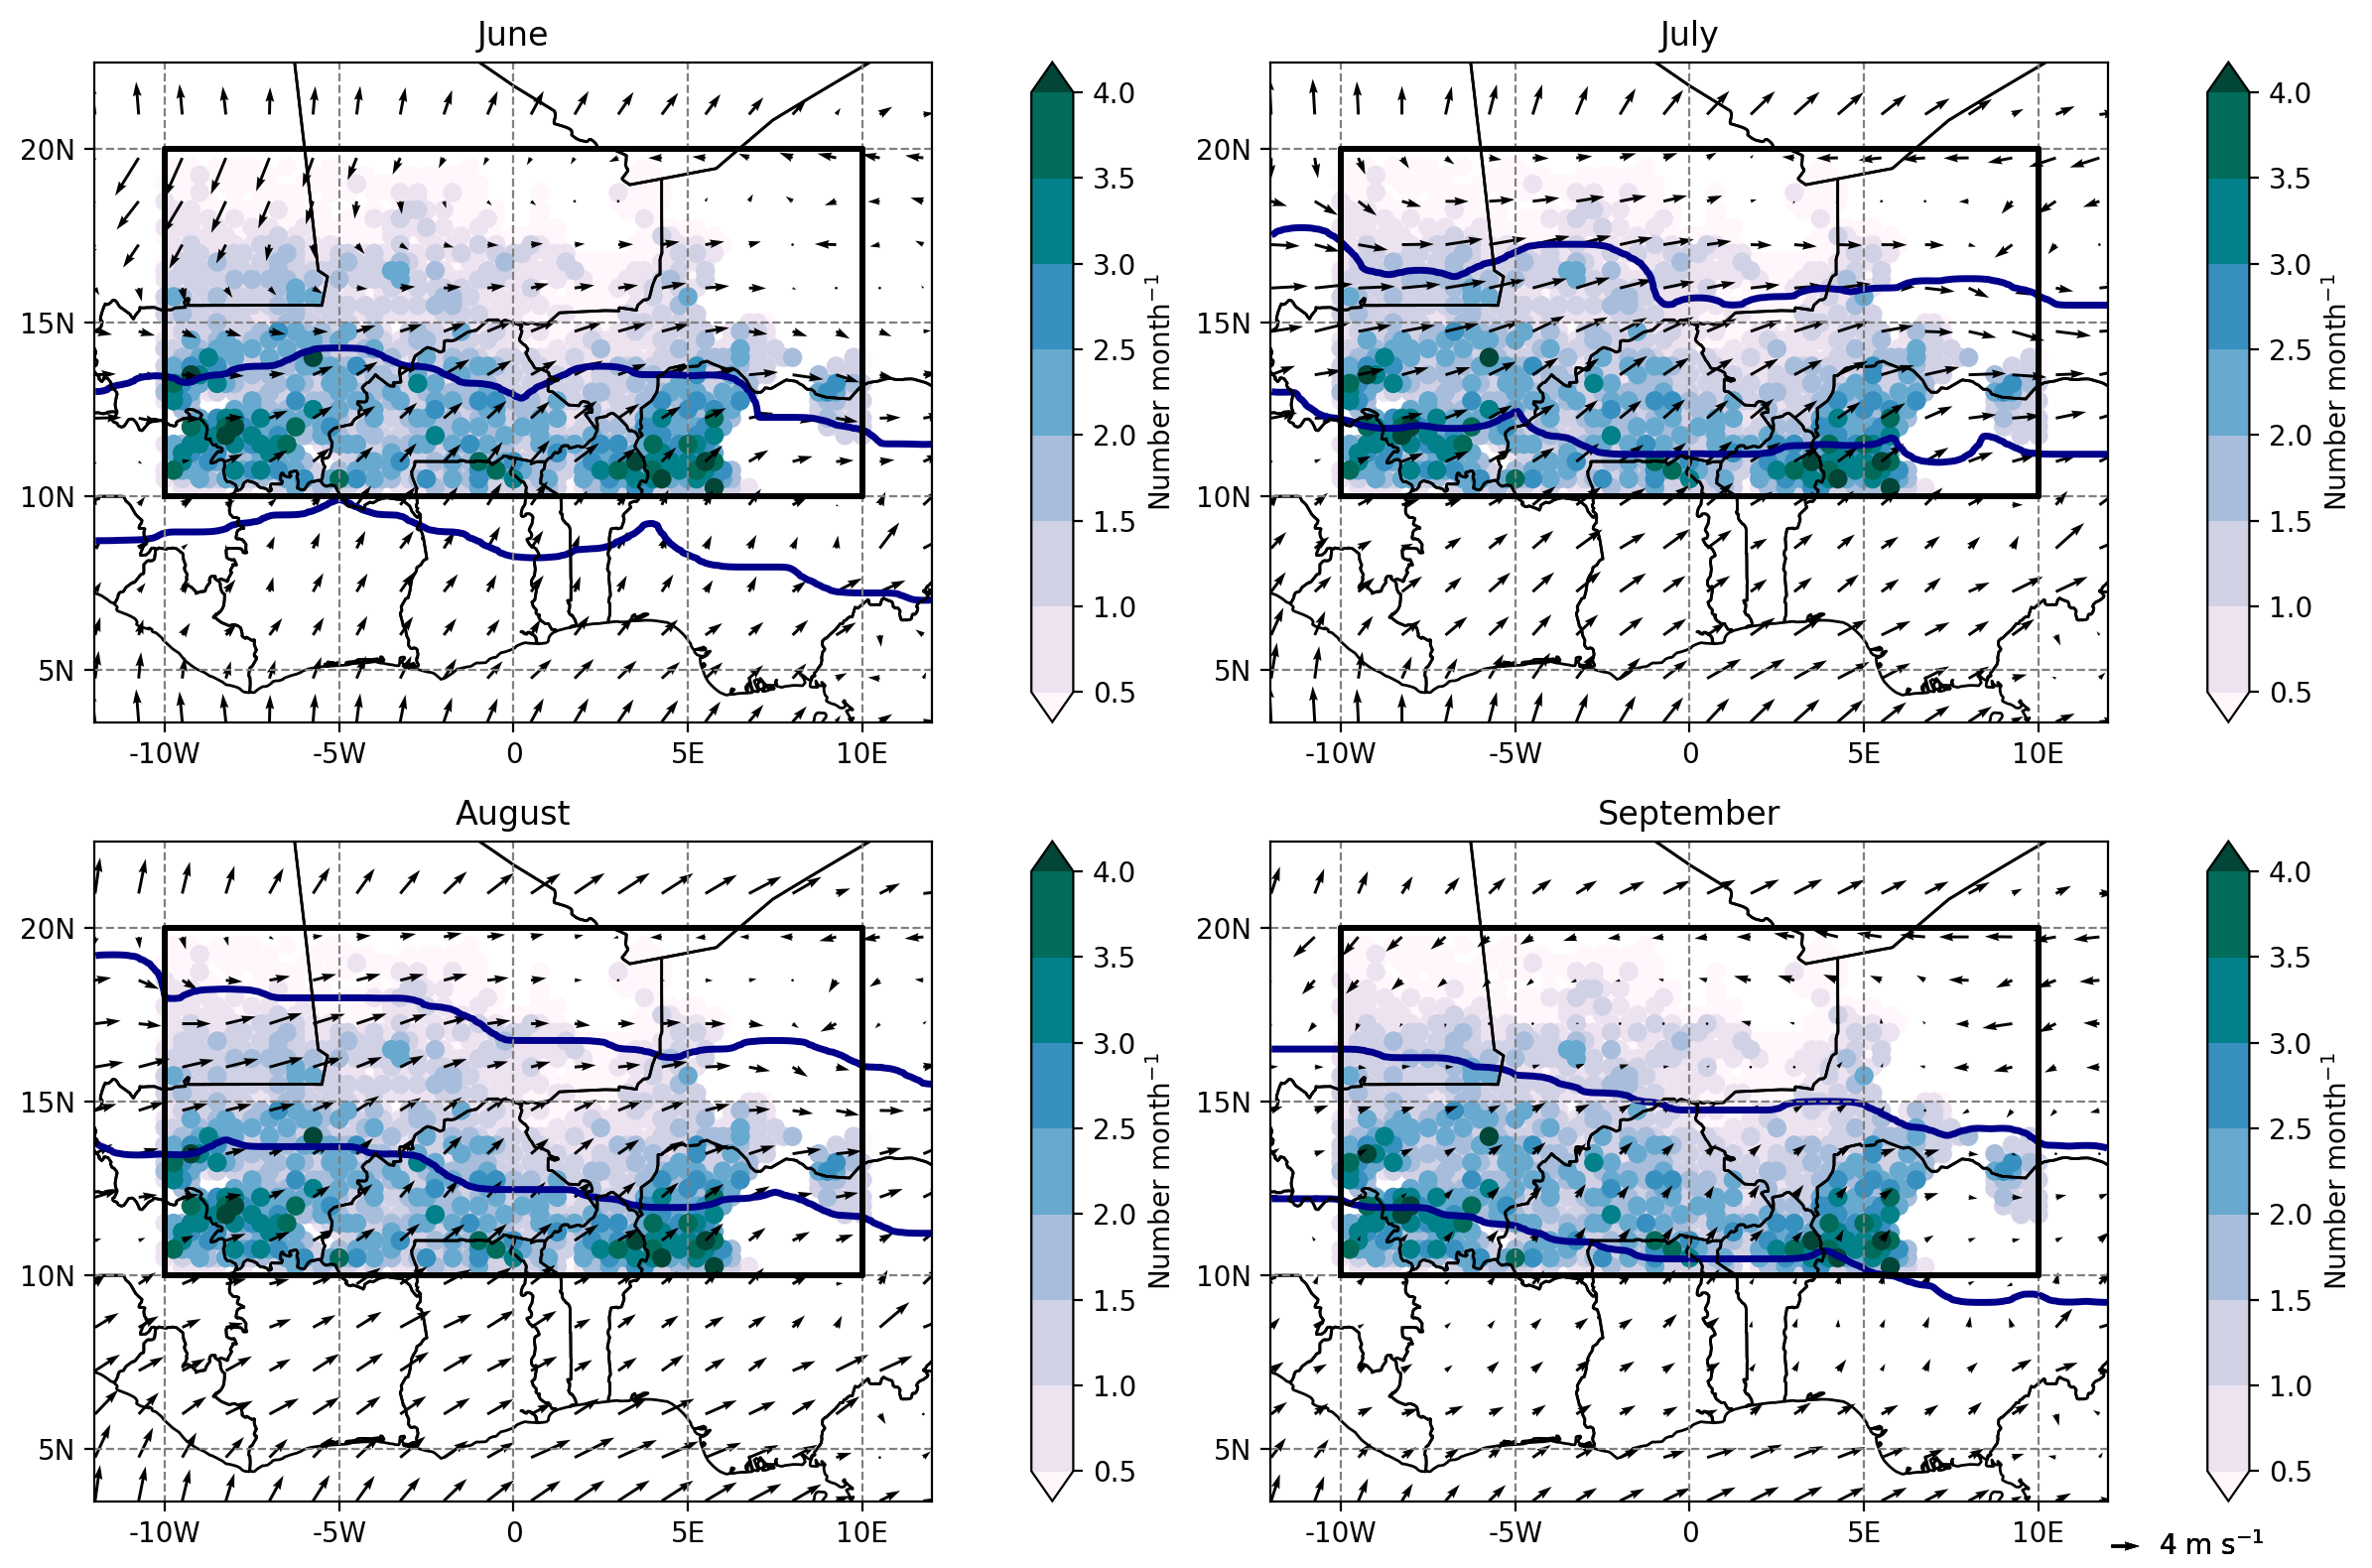

In [49]:
tables = '/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged2/'


f = plt.figure(figsize=(12,8), dpi=200)
mname = ['June', 'July', 'August', 'September']

for ids, m in enumerate([6,7,8,9]):
    
    pl_clim = xr.open_dataset(file + 'monthly/synop_selfmade/CLIM_2006-2010_new/ERA5_2006-2010_CLIM_'+ \
                              str(m).zfill(2)+'-'+str(12).zfill(2)+'_pl_rw.nc')
    pl_clim = uda.flip_lat(pl_clim)
    pl_clim = pl_clim.sel(latitude=slice(3,22), longitude=slice(-12,12))
    
    u = pl_clim['u'].sel(level=650).squeeze()
    
    usrfc =pl_clim['u'].sel(level=925).squeeze() 
    vsrfc =pl_clim['v'].sel(level=925).squeeze() 
    
    
    #aej_speed = u.min('latitude')

    posmin = np.argmin(u.values, axis=0)
    aej_lat = u.latitude.values[posmin]
    
    perc = np.percentile(u.values, 10, axis=0)
    empty = np.zeros_like(u.values)
    #empty[posmin,np.arange(u.shape[1])] = 1
    
    for pids, pp in enumerate(perc):
        parr = empty[:,pids]
        uarr = u[:,pids]
        ppos = np.where(uarr<=pp)
        parr[ppos] = 1
        empty[:,pids ] = parr
        
    earr = u.copy()
    earr.values = empty
    #empty = ndimage.gaussian_filter(empty,10, mode='nearest')
    
    #ipdb.set_trace()
       
    monthly = cores[cores['time.month']==m]
    ax = f.add_subplot(2,2,ids+1)
    sums = None
    cnt = 0
    x = []
    y = []
    val = []
    
    #sums = u.copy()*0
    
    for h in list(np.arange(15,24))+list(np.arange(0,8)): 
        
        msgopen = pd.read_csv(
            tables + 'cores_gt15000km2_table_AMSRE_tracking2_' + str(
                h) + '_init.csv', na_values=[-999, -99])

        msg = pd.DataFrame.from_dict(msgopen)# &  &
        #msg['date'] = pd.to_datetime(msg[['year','month','day']])

        msgopen = msg

        #basic filter
        msgopen = msgopen[(msgopen['month']==m) & (msgopen['lat']>9.5) & (msgopen['lat']<20.5) & (msgopen['topo']<=450) & (msgopen['dtime']<=2)]
        #propagation filter
        msgopen = msgopen[(msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5)]
        
        
#         for dids, dit in msgopen.iterrows():

#             lat = dit.lat
#             lon = dit.lon

#             try:
#                 point = dummy.sel(latitude=lat, longitude=lon, method='nearest')
#             except KeyError:
#                 ipdb.set_trace()
#                 continue
#             plat = point['latitude'].values
#             plon = point['longitude'].values


#             xpos = np.where(dummy['longitude'].values == plon)
#             xpos = int(xpos[0])
#             ypos = np.where(dummy['latitude'].values == plat)
#             ypos = int(ypos[0])
            
#             sums.values[ypos,xpos]+=1
            

#     sums.name = 'count'
#     sums_on_topo = dummy.salem.lookup_transform(sums, method=np.sum)
    coarse_topo = dummy.salem.lookup_transform(t1)
    
    empty_on_map = t1.salem.transform(earr, interp='linear')
    empty_on_map = ndimage.gaussian_filter(empty_on_map,10, mode='nearest')
    
#     sums_on_topo.values[coarse_topo>420]=0
    
    pos = np.where(sums_on_topo>0)
    xv = (dummy['longitude'])[pos[1]]
    yv = (dummy['latitude'])[pos[0]]
    points = sums_on_topo.values[pos]
#     xv, yv = np.meshgrid(sums['lon'], sums['lat'])
    xl, yl = map.grid.transform(xv, yv)
    
    st=5
    windx = (dummy['longitude'])[0::st]
    windy = (dummy['latitude'])[0::st]
    usrfc = usrfc[0::st, 0::st]
    vsrfc = vsrfc[0::st, 0::st]
    
    #ipdb.set_trace()
    
    xx, yy = map.grid.transform(windx, windy)
    
    xx, yy = np.meshgrid(xx, yy)
    
    
    #aejx, aejy = map.grid.transfrom(dummy['longitude'],aej_lat)
    
    sort = np.argsort(points)
    xl = xl[sort]
    yl = yl[sort]
    points = points[sort]
    
    masked = np.ma.masked_invalid(sums_on_topo)
    #ipdb.set_trace()
    map.set_data()
    #map.set_data(masked, interp='linear', crs=dummy.salem.grid)
    #map.set_plot_params(cmap='Blues', levels=[400,450])

    dl = DataLevels(points/5, levels=np.arange(0.5, 4.1, 0.5), extend='both', cmap='PuBuGn')
    cax = ax.scatter(xl, yl, c=dl.to_rgb())
    dl.append_colorbar(ax, label=r'Number month$^{-1}$')
    map.set_contour(empty_on_map, colors='darkblue', levels=[0.000007,1], linewidths=2.5)
    
    qu = ax.quiver(xx, yy, usrfc, vsrfc, scale=120, headwidth=3)
    qk = plt.quiverkey(qu, 0.9, 0.02,4, '4 m s$^{-1}$',
                       labelpos='E', coordinates='figure')
    
    left = -10
    bottom = 10
    right = 10
    top = 20
    
    s = np.array([(left, bottom), (right, bottom),
                              (right, top), (left, top)])
    l1 = shpg.LinearRing(s)
    #ipdb.set_trace()
    map.set_geometry(l1, crs=map.grid.proj, linewidth=2, zorder=99)
    
    #, fontweight='bold', fontname='Ubuntu', ha='left', loc='left'
    map.visualize(ax=ax, addcbar=False, title=mname[ids])
   
    
    
plt.tight_layout()
f.savefig(cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients/2hOverlap/maps2.png')
        
    
        

In [ ]:
empty.max()

In [ ]:
plt.imshow(sums_on_topo)

In [ ]:
    topo_on_lsta = ds.salem.lookup_transform(top)
    grad = np.gradient(topo_on_lsta.values)
    gradsum = abs(grad[0]) + abs(grad[1])
    msg_on_lsta = ds.salem.transform(msg_mins)
    topo_on_lsta.values[gradsum > 30] = np.nan
    topo_on_lsta.values[topo_on_lsta>400] = np.nan
    
    
    xv, yv = np.meshgrid(lsta['lon'], lsta['lat'])
    xl, yl = map.grid.transform(xv, yv)


    for rh in [3,6,9,12,15,18,21,24]:
        pos = np.where((cells<=rh) & (cells>rh-3))

        if rh == 24:
            cells[pos] = 0
        else:
            cells[pos] = rh

    cmap2 = plt.get_cmap('RdBu_r')
    cmap2.set_bad('Grey', 1.)

    wavelet = plt.get_cmap('PuRd')
    wavelet.set_bad('Grey', 1.)

    # topobad = plt.get_cmap('topo')
    # topobad.set_bad('Grey', 1.)

    f= plt.figure(figsize=(13,7))

    ax1=f.add_subplot(2,2,1)
    masked = np.ma.masked_invalid(lsta_raw)
    map.set_data(masked, interp='linear')
    map.set_plot_params(cmap=cmap2, levels=[-6,-4,-2,-1,-0.5,0.5,1,2,4,6])
    #map.set_lonlat_contours(interval=0)

    map.visualize(ax=ax1, cbar_title='K', addcbar=True, title='28-06-2006: 0630-1600UTC LSTA & afternoon/nighttime cores')
    cax = ax1.scatter(xl, yl, c=cells, cmap=cmap_back, s=15)
    cax = ax1.scatter(xl, yl, c=cells, cmap=cmap, s=6)
    cbar = plt.colorbar(cax, ticks=[0,3,6,9,12,15,18,21], fraction=0.07, pad=0.5, orientation='horizontal')
    cbar.set_ticklabels([ '22-0','1-3','4-6','7-9','10-12','13-15', '16-18', '19-21'])
    cbar.set_label('Hours of day')
    ax1.get_xaxis().set_visible(False)

    # print('Topo min', np.min(topo_on_lsta))
    ax2 = f.add_subplot(2, 2, 2)
    map.set_plot_params(cmap='topo', vmin=np.nanmin(topo_on_lsta), vmax=1000, extend='both')
    masked = np.ma.masked_invalid(topo_on_lsta)
    map.set_data(masked)
    map.set_contour(topo_on_lsta, levels=np.arange(400,1000,25), cmap='Greys_r')
    map.set_contour(msg_on_lsta, levels=np.arange(-80,-40,5), cmap='jet_r')
    map.visualize(ax=ax2, addcbar=True )
    map.visualize(ax=ax2, cbar_title='m', title='Domain topography, total height difference: 342m')
    #cax = ax2.scatter(xl, yl, c=cells, cmap=cmap_back, s=20)
    #cax = ax2.scatter(xl, yl, c=cells, cmap=cmap, s=10)
    #plt.scatter(xv, yv, c=cells, cmap='jet', s=5)
    map.set_contour()

    ax3 = f.add_subplot(2, 2, 3)
    map.set_plot_params(cmap=wavelet, vmin=0, vmax=5)
    map.set_data(ppower_small)
    map.visualize(ax=ax3, cbar_title='Wavelet power', title='Surface scales 9 - 30km')
    #ax3.scatter(xl, yl, c=cells, cmap=cmap, s=5)
    #plt.scatter(xv, yv, c=cells, cmap='jet', s=5)

    ax4 = f.add_subplot(2, 2, 4)
    map.set_plot_params(cmap=wavelet, vmin=0, vmax=5)
    map.set_data(ppower_big)
    map.visualize(ax=ax4, cbar_title='Wavelet power', title='Surface scales 80 - 250km')
    #ax4.scatter(xl, yl, c=cells, cmap=cmap, s=5)

    plt.tight_layout()
    #plt.savefig('/users/global/cornkle/figs/LSTA-bullshit/GEWEX/example_map.png')


    # ax2=f.add_subplot(2,2,2)
    # map.set_data(msg_on_lsta, interp='linear')
    # map.set_plot_params(cmap='viridis', vmin=-80, vmax=-70)
    # map.visualize(ax=ax2, addcbar=True )
    #cax = ax1.scatter(xl, yl, c=cells, cmap=cmap, s=5)

    # qu = ax2.quiver(xx,yy,u_on_lsta,v_on_lsta, scale=60)
    # qk = plt.quiverkey(qu, 0.7, 0.95, 3, '3 m s$^{-1}$',
    #                    labelpos='E', coordinates='figure')
